### Statistical Inference: Spotify Data

In [2]:
#import necessary packages and libraries
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import the data using pandas
spotify_data = pd.read_csv("spotify_data.csv") 
#show the first 10 rows of data
spotify_data.head(10)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928
6,0.956,"['Franz Liszt', 'Vladimir Horowitz']",0.444,136627,0.1970,0,6O0puPuyrxPjDTHDUgsWI7,0.435,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.0400,80.495,0.3050,1928
7,0.988,['Carl Woitschach'],0.555,153967,0.4210,0,6OJjveoYwJdIt76y0Pxpxw,0.836,1,0.1050,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.310,0.8570,1928
8,0.995,"['Francisco Canaro', 'Charlo']",0.683,162493,0.2070,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.1270,119.833,0.4930,1928
9,0.846,['Seweryn Goszczyński'],0.674,111600,0.2050,0,6PrZexNb16cabXR8Q418Xc,0.000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,1928,0.9540,81.249,0.7590,1928


In [3]:
#print descriptive statistics for "danceability" variable
spotify_data['danceability'].describe()

count    169909.000000
mean          0.538150
std           0.175346
min           0.000000
25%           0.417000
50%           0.548000
75%           0.667000
max           0.988000
Name: danceability, dtype: float64

In [4]:
#print descriptive statistics for "valeance" variable
spotify_data['valence'].describe()

count    169909.000000
mean          0.532095
std           0.262408
min           0.000000
25%           0.322000
50%           0.544000
75%           0.749000
max           1.000000
Name: valence, dtype: float64

In [5]:
#calculate the meadian and the mode using library functions
print("Danceability")
print("- Median", spotify_data['danceability'].median())
print("- Mode", spotify_data['danceability'].mode())

print("Valence")
print("- Median", spotify_data['valence'].median())
print("- Mode", spotify_data['valence'].mode())

Danceability
- Median 0.5479999999999999
- Mode 0    0.565
dtype: float64
Valence
- Median 0.544
- Mode 0    0.961
dtype: float64


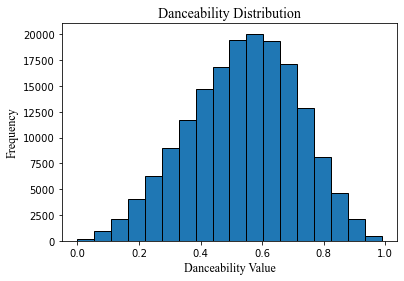

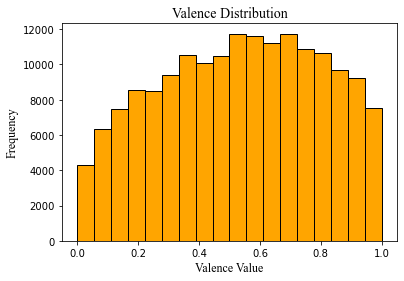

In [6]:
#transfer the data into a list
danceability = spotify_data['danceability'].tolist()
valence = spotify_data['valence'].tolist()

#create histograms for each variable
spotify_data['danceability'].plot(kind = 'hist', bins = 18, ec = 'black')
plt.title('Danceability Distribution', fontname = 'times new roman', fontsize = 14)
plt.xlabel('Danceability Value', fontname = 'times new roman', fontsize = 12)
plt.ylabel('Frequency', fontname = 'times new roman', fontsize = 12)
plt.show()
spotify_data['valence'].plot(kind = 'hist', bins = 18, ec = 'black', color = 'orange')
plt.title('Valence Distribution', fontname = 'times new roman', fontsize = 14)
plt.xlabel('Valence Value', fontname = 'times new roman', fontsize = 12)
plt.ylabel('Frequency', fontname = 'times new roman', fontsize = 12)
plt.show()

In [7]:
#divide valence data into two parts and finding statistics of danceability for both

less_05 = spotify_data[spotify_data['valence'] < 0.5]
more_05 = spotify_data[spotify_data['valence'] > 0.5]

print("Valence less than 0.5:")
print("-Mean:", less_05['danceability'].mean())
print("-SD:", np.std(less_05['danceability'], ddof = 1))
print("-Sample size:", len(less_05))
                      
print("Valence more than 0.5:")
print("-Mean:", more_05['danceability'].mean())
print("-SD:", np.std(more_05['danceability'], ddof = 1))
print("-Sample size:", len(more_05))

Valence less than 0.5:
-Mean: 0.447634003172918
-SD: 0.17063028352311016
-Sample size: 75640
Valence more than 0.5:
-Mean: 0.6109234717630982
-SD: 0.1421120289361929
-Sample size: 94079


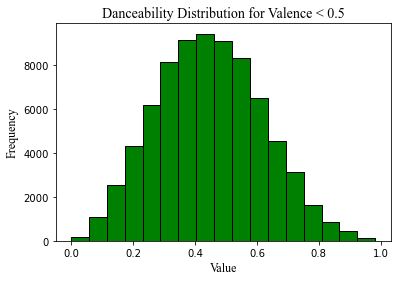

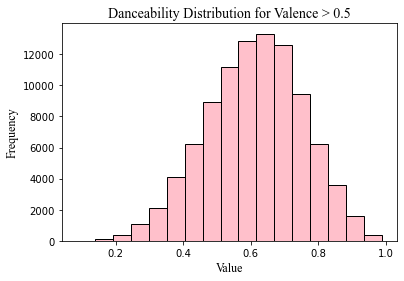

In [8]:
less_05['danceability'].plot(kind = 'hist', bins = 17, ec = 'black', color = 'green')
plt.title('Danceability Distribution for Valence < 0.5', fontname = 'times new roman', fontsize = 14)
plt.xlabel('Value', fontname = 'times new roman', fontsize = 12)
plt.ylabel('Frequency', fontname = 'times new roman', fontsize = 12)
plt.show()
more_05['danceability'].plot(kind = 'hist', bins = 17, ec = 'black', color = 'pink')
plt.title('Danceability Distribution for Valence > 0.5', fontname = 'times new roman', fontsize = 14)
plt.xlabel('Value', fontname = 'times new roman', fontsize = 12)
plt.ylabel('Frequency', fontname = 'times new roman', fontsize = 12)
plt.show()

In [16]:
#calculate the difference of means
n1 = len(less_05)   
n2 = len(more_05)
    
x1 = less_05['danceability'].mean()
x2 = more_05['danceability'].mean()
    
s1 = np.std(less_05['danceability'], ddof = 1) #apply Bessel's correction
s2 = np.std(more_05['danceability'], ddof = 1)
    
SE = np.sqrt((s1**2)/n1 + (s2**2)/n2)
tscore = np.abs((x2-x1))/SE 
df = min(n1, n2) - 1 #find degrees of freedom
    
pvalue = 2*stats.t.cdf(-tscore, df) #2 tails

Spooled = np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
g = (x1-x2)/Spooled

print("Standard Error", SE)
print("T-score", tscore)
print("Degrees of freedom:", df)
print("P-value:", pvalue) 
print("Hedge's g:", g)

Standard Error 0.0007743256212328783
T-score 210.87958878358097
Degrees of freedom: 75639
P-value: 0.0
Hedge's g: -1.0502990917576709


In [26]:
#calculate the confidence interval
mean = (x1+x2)/2

ME = tscore*np.sqrt(SE/(n1+n2))

upperbound = mean + ME
lowerbound = mean - ME

print('Confidence interval:', [lowerbound, upperbound])

Confidence interval: [0.51503476489526, 0.5435227100407563]
